In [2]:
#import relevant stuff
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.optimize import curve_fit
import os
import pandas as pd

In [3]:
#constants
v_out=10 #m/s
r_hole=0.01 #m
A_hole=np.pi*r_hole**2
c_p=10**3 #J/(kg*K)
T_g=16 #celcius
T_s=26 #celcius
delta_T=T_s-T_g #Kelvin
l=10
ro_air=1.225 #Kg/m**3
plates=36 #number of plates in a unit

#definitions
P_plate=v_out*A_hole*ro_air*c_p*delta_T
P_unit=plates*P_plate

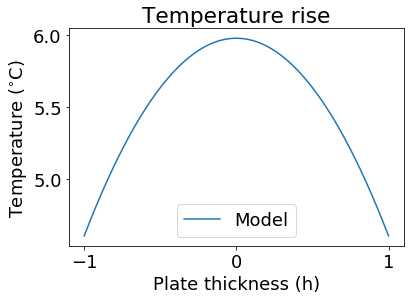

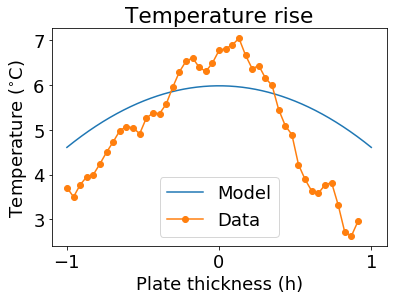

In [108]:
#temperature rise in a plate

plt.rcParams.update({'font.size': 18})

#constants

b=0.7 #m - width
h=0.01 #m - 1/2 *  height
l=1.3 #m - length
V_plate=l*b*(2*h) #m^3 - volume of a layer (plate)
d=0.027 #m - distance between the plates

T_air=0 #K - temperature of the air
k=0.2 #W/(m*K) - thermal conductivity
P_plate=100 #W - power of a plate
c_f=1/4*0.05 #UNIT - friction factor of surface
c_p=2000 #J/(kg*K) - specific heat capacity of air
ro_air=1.225 #kg/m**3 - density of air
v_in=15 #m/s - speed of air flowing in 

r_nozzle= 1/2*0.025 #m - radius of the nozzle
Q_in=v_in*np.pi*r_nozzle**2 #UNIT - volumetric flux of air
v_air=Q_in/(b*d) #m/s - speed of air at measurement point
h_c=c_f*ro_air*v_air*c_p

def T_z(zs):
    return T_air+((h**2)*P_plate)/(k*V_plate)*((1/2)*(1-((zs)**2))+k/(h*h_c))

T_array=[]
z_array=[]

for z in range(-1000,1001):
    z/=1000
    z_array.append(z)
    T_array.append(T_z(z))
    
plt.plot(z_array,T_array,label="Model")
plt.ylabel("Temperature ($^{\circ}$C) ")
plt.xlabel("Plate thickness (h)")
plt.title("Temperature rise")
plt.xticks([-1,0,1])
plt.legend()
plt.savefig("Temperature_rise_plate.png",dpi=600,bbox_inches='tight')
plt.show()

file="C:\\Users\\brouw\\Desktop\\koppert\\TemperatureProfilecrossection.xlsx"

df = pd.read_excel(file,"Blad1")
#print(df.head())

h_array=np.array(df['h'])
Temp_array_meas=np.array(df['Temperature'])
Temp_array_meas-=26



plt.plot(z_array,T_array,label="Model")
plt.plot(h_array,Temp_array_meas,"-o",label="Data")
plt.ylabel("Temperature ($^{\circ}$C) ")
plt.xlabel("Plate thickness (h)")
plt.title("Temperature rise")
plt.xticks([-1,0,1])
plt.legend()
plt.savefig("Temperature_rise_plate_data.png",dpi=600,bbox_inches='tight')
plt.show()

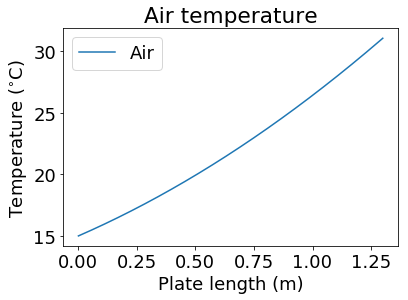

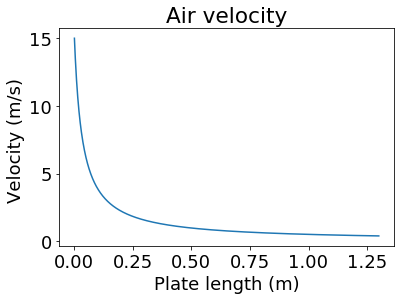

In [109]:
#air temperature over the length of the plate

T_air_0=15 #degree Kelvin/Celcius
b_0= (np.pi * r_nozzle**2)/d
v_0=Q_in/(b_0*d)


def T_air(x):
    return T_air_0+((2*b*(x/l)+(b-b_0)*(x/l)**2)/(b+b_0))*(P_plate/(c_p*Q_in*ro_air))

def b_triangle(x):
    return b_0+(b-b_0)*(x/l)

def v_air(x):
    return v_0*(b_0/b_triangle(x))

x_array=[]
T_array=[]

for x in range(-0,1001):
    x*=l
    x/=1000
    x_array.append(x)
    T_array.append(T_air(x))
    
plt.plot(x_array,T_array,label="Air")
plt.ylabel("Temperature ($^{\circ}$C) ")
plt.xlabel("Plate length (m)")
plt.title("Air temperature")
plt.legend()
plt.savefig("Temperature_rise_air.png",dpi=600,bbox_inches='tight')
plt.show()

x_array=[]
T_array=[]

for x in range(-0,1001):
    x*=l
    x/=1000
    x_array.append(x)
    T_array.append(v_air(x))

plt.plot(x_array,T_array,label="Air")
plt.ylabel("Velocity (m/s) ")
plt.xlabel("Plate length (m)")
plt.title("Air velocity")
plt.savefig("Velocity_air.png",dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
Temp_array_room=[28,29,25,25,26,28,29,29,29]
Temp_array_air=[20,23,20,15,17,22,25,28,29]

t_array=[]
P_array=[]

for n,t in enumerate(Temp_array_room):
    delta_T_measurement=t-Temp_array_air[n]
    P_plate=v_out*A_hole*ro_air*c_p*delta_T_measurement
    t_array.append(n*3)
    P_array.append((P_plate*plates)/1000)
    
plt.plot(t_array,P_array,'-o')
plt.xlabel("Time (days)")
plt.ylabel("Power of a single unit (KW)")
plt.title("Power of a single unit (during high wind speed) \n lower bound")
plt.savefig("power.png",dpi=600)
plt.show()

plt.plot(t_array,Temp_array_air,'-o',label="Room Temperature")
plt.plot(t_array,Temp_array_room,'-o',label="Air Temperature")
plt.xlabel("Time (days)")
plt.ylabel("Temperature (C)")
plt.title("Temperature or Room and Air")
plt.legend()
plt.savefig("temp.png",dpi=600)
plt.show()

In [ ]:
file="C:\\Users\\brouw\\Desktop\\koppert\\Excel data\\room4_summarized.xlsx"

df = pd.read_excel(file,"Blad1")
#print(df.head())

left_wind=np.array(df['left_wind'])
right_wind=np.array(df['right_wind'])
cell=np.array(df['cell'])
time=np.array(df['time'])

t_array=[]
P_array_right=[]
P_array_left=[]

for n,t in enumerate(cell):
    delta_T_right=t-right_wind[n]
    delta_T_left=t-left_wind[n]
    
    P_plate_right=v_out*A_hole*ro_air*c_p*delta_T_right
    P_plate_left=v_out*A_hole*ro_air*c_p*delta_T_left
    
    t_array.append(n/12) #12 measurements per day
    P_array_right.append((P_plate_right*plates)/1000)
    P_array_left.append((P_plate_left*plates)/1000)
    
plt.plot(t_array,right_wind,label="Wind (right side)")
plt.plot(t_array,left_wind,label="Wind (left side)")
plt.plot(t_array,cell,label="Room")
plt.xlabel("Time (days)")
plt.ylabel("Temperature ($^{\circ}$C)")
plt.title("Room 4 \n Temperature")
plt.legend()
plt.savefig("temp_measured.png",dpi=600)
plt.show()
    
plt.plot(t_array,P_array_right,label="Wind (right side)")
plt.plot(t_array,P_array_left,label="Wind (left side)")
plt.xlabel("Time (days)")
plt.ylabel("Power of a single unit (KW)")
plt.title("Room 4 \n Power of a single unit (wind speed = 10 m/s)")
plt.legend()
plt.savefig("power_measured.png",dpi=600)
plt.show()


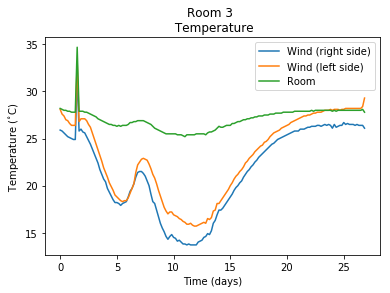

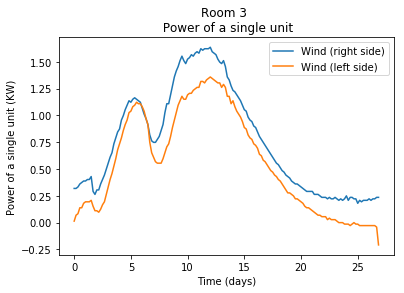

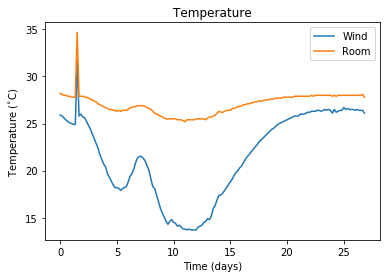

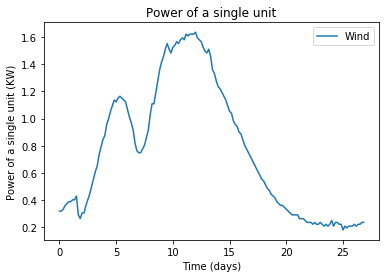

In [5]:
file="C:\\Users\\brouw\\Desktop\\koppert\\Excel data\\room4_summarized_longer.xlsx"


df = pd.read_excel(file,"Blad1")
#print(df.head())

left_wind=np.array(df['left_wind'])
right_wind=np.array(df['right_wind'])
cell=np.array(df['cell'])
time=np.array(df['time'])

t_array=[]
P_array_right=[]
P_array_left=[]

for n,t in enumerate(cell):
    delta_T_right=t-right_wind[n]
    delta_T_left=t-left_wind[n]
    
    P_plate_right=v_out*A_hole*ro_air*c_p*delta_T_right
    P_plate_left=v_out*A_hole*ro_air*c_p*delta_T_left
    
    t_array.append(n/6) #6 measurements per day
    P_array_right.append((P_plate_right*plates)/1000)
    P_array_left.append((P_plate_left*plates)/1000)
    
plt.plot(t_array,right_wind,label="Wind (right side)")
plt.plot(t_array,left_wind,label="Wind (left side)")
plt.plot(t_array,cell,label="Room")
plt.xlabel("Time (days)")
plt.ylabel("Temperature ($^{\circ}$C)")
plt.title("Room 3 \n Temperature")
plt.legend()
plt.savefig("temp_measured_longer.png",dpi=600)
plt.show()
    
plt.plot(t_array,P_array_right,label="Wind (right side)")
plt.plot(t_array,P_array_left,label="Wind (left side)")
plt.xlabel("Time (days)")
plt.ylabel("Power of a single unit (KW)")
plt.title("Room 3 \n Power of a single unit") #(wind speed = 10 m/s)
plt.legend()
plt.savefig("power_measured_longer.png",dpi=600)
plt.show()

#only the right curve for clarity

plt.plot(t_array,right_wind,label="Wind")
plt.plot(t_array,cell,label="Room")
plt.xlabel("Time (days)")
plt.ylabel("Temperature ($^{\circ}$C)")
plt.title("Temperature")
plt.legend()
plt.savefig("temp_measured_longer_right.png",dpi=600)
plt.show()
    
plt.plot(t_array,P_array_right,label="Wind")
plt.xlabel("Time (days)")
plt.ylabel("Power of a single unit (KW)")
plt.title("Power of a single unit")
plt.legend()
plt.savefig("power_measured_longer_right.png",dpi=600)
plt.show()